<a href="https://colab.research.google.com/github/20NN1A05D2-Sandhya/Deep_Learning_Techniques/blob/main/ANN_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_train[:50]


array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0],
       [0],
       [9],
       [1],
       [3],
       [4],
       [0],
       [3],
       [7],
       [3],
       [3],
       [5],
       [2],
       [2],
       [7],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0]], dtype=uint8)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_samp(x,y,index):
  plt.figure(figsize=[11,2])
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

In [ ]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

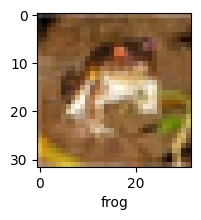

In [ ]:
plot_samp(x_train,y_train,0)

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
ANN=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                       layers.Dense(3000,activation='relu'),
                       layers.Dense(1000,activation='relu'),
                       layers.Dense(10,activation='softmax')])

In [ ]:
ANN.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
ANN.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 146s 93ms/step - loss: 1.8160 - accuracy: 0.3541
Epoch 2/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.6249 - accuracy: 0.4252
Epoch 3/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.5417 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 140s 90ms/step - loss: 1.4824 - accuracy: 0.4788
Epoch 5/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4319 - accuracy: 0.4940


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict=ANN.predict(x_test)
y_predict_classes=[np.argmax(element) for element in y_predict]
print('Classification Report',classification_report(y_test,y_predict_classes))

313/313 [==============================] - 14s 44ms/step
Classification Report               precision    recall  f1-score   support

           0       0.56      0.46      0.51      1000
           1       0.66      0.56      0.61      1000
           2       0.38      0.33      0.35      1000
           3       0.34      0.24      0.28      1000
           4       0.49      0.31      0.38      1000
           5       0.26      0.64      0.37      1000
           6       0.58      0.39      0.47      1000
           7       0.43      0.64      0.51      1000
           8       0.73      0.46      0.56      1000
           9       0.62      0.50      0.55      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.46     10000
weighted avg       0.50      0.45      0.46     10000

